<a href="https://colab.research.google.com/github/amirnugroho/amirnugroho/blob/main/227006516039_Amir_Nugroho_UAS_Machine_Learning_R02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mempersiapkan Environment**

In [ ]:
# For Data
import numpy  as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px

# Data spliting
from sklearn.model_selection import train_test_split

# Regression & Classification Models
from sklearn.linear_model    import LinearRegression, LogisticRegression
from sklearn.ensemble        import RandomForestClassifier, RandomForestRegressor
from sklearn.tree            import DecisionTreeClassifier, DecisionTreeRegressor


#Clustering Models
from sklearn.cluster import KMeans, DBSCAN

#Evaluation
from sklearn.metrics import (mean_absolute_error as mae,
                             mean_squared_error  as mse,
                             classification_report,
                             confusion_matrix )

import warnings
warnings.filterwarnings('ignore')

Kode ini bertujuan untuk mengimpor semua pustaka (library) Python yang dibutuhkan untuk analisis data dan machine learning. Setiap pustaka memiliki peran spesifik:

pandas: Untuk memanipulasi dan mengelola data dalam format tabel (DataFrame).

numpy: Untuk operasi numerik dan matematika yang efisien.

matplotlib.pyplot dan seaborn: Untuk membuat visualisasi data (grafik dan plot) yang informatif dan menarik.

sklearn: Pustaka utama untuk tugas machine learning, mencakup pra-pemrosesan data, pemodelan, dan evaluasi.

In [ ]:
# Baca file CSV langsung ke dalam variabel 'data'
data = pd.read_csv("/content/forestfires.csv")

# Tampilkan informasi data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Kode ini memuat dataset kebakaran hutan dari file forestfires.csv ke dalam sebuah DataFrame pandas yang diberi nama df. DataFrame ini adalah struktur data utama yang akan kita gunakan untuk seluruh analisis.

In [ ]:
# Handling The Null data
data.isna().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


Kode data.isna().sum() adalah perintah yang sangat umum digunakan dalam analisis data dengan Python, khususnya menggunakan pustaka pandas. Tujuan utamanya adalah untuk menghitung jumlah total data yang hilang (atau kosong) di setiap kolom dalam sebuah dataset.

In [ ]:
# remove any dublicates form the data
data.drop_duplicates(inplace=True)

In [ ]:
# remove object dTypes
months = {'jan' : 1 , 'feb': 2 ,'mar': 3, 'apr': 4, 'may':5, 'jun':6, 'jul': 7, 'aug': 8 , 'sep': 9, 'oct': 10, 'nov': 11,  'dec': 12}
days = {'sat':1, 'sun':2, 'mon': 3, 'tue':4, 'wed': 5, 'thu': 6, 'fri':7}

data['month'] = data['month'].apply(lambda x: months[x])
data['day'] = data['day'].apply(lambda x: days[x])

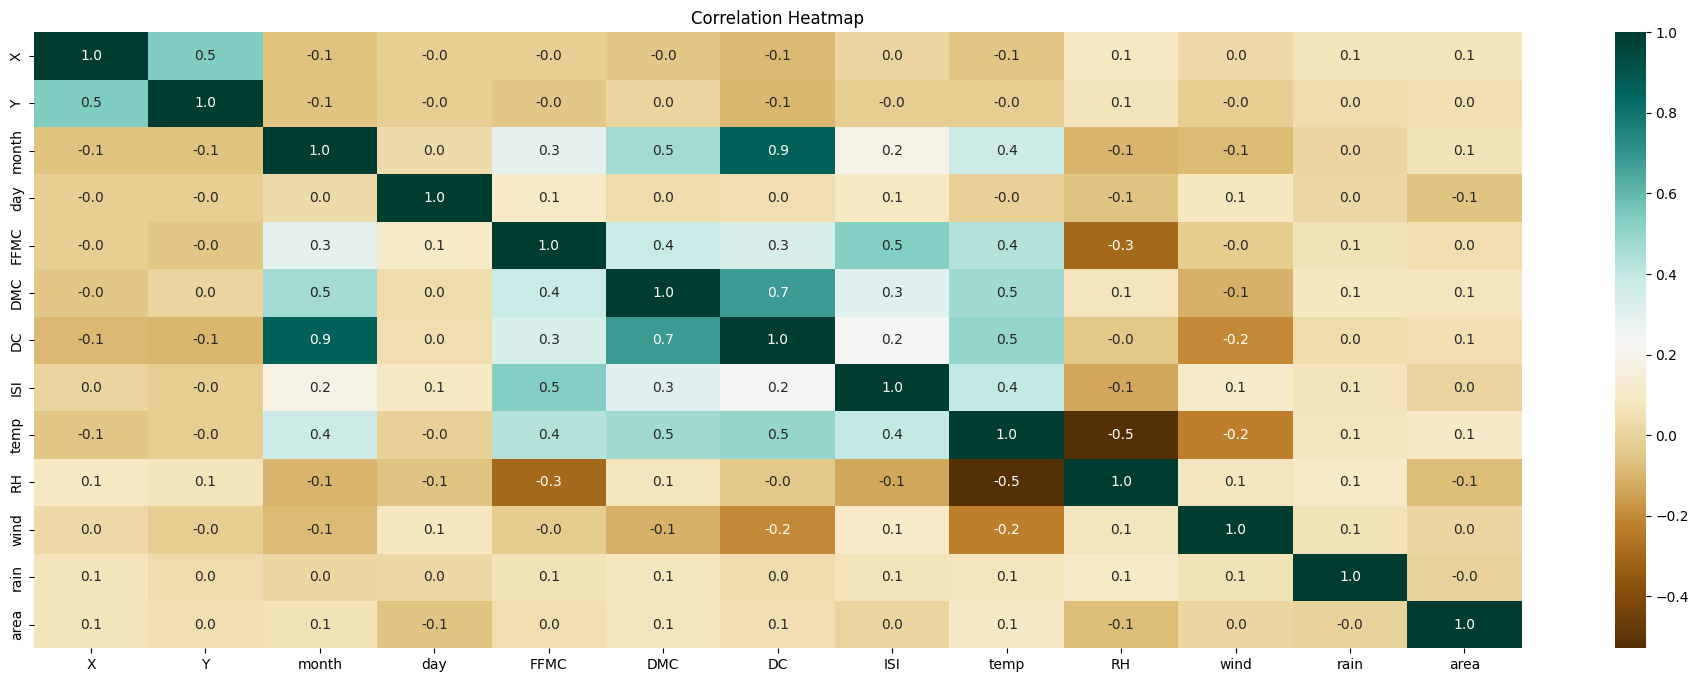

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.542705,-0.066942,-0.016523,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176,0.062930
Y,0.542705,1.000000,-0.065383,-0.021853,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313,0.045168
month,-0.066942,-0.065383,1.000000,0.029893,0.293428,0.464361,0.867865,0.185696,0.369134,-0.100175,-0.085160,0.013187,0.057623
day,-0.016523,-0.021853,0.029893,1.000000,0.100396,0.032654,0.044576,0.085924,-0.011168,-0.058311,0.076458,0.015205,-0.058180
FFMC,-0.020499,-0.045979,0.293428,0.100396,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806,0.040232
DMC,-0.048861,0.008210,0.464361,0.032654,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780,0.073783
DC,-0.088801,-0.098496,0.867865,0.044576,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690,0.050313
ISI,0.006033,-0.023142,0.185696,0.085924,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664,0.008411
temp,-0.051070,-0.023871,0.369134,-0.011168,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526,0.098222
RH,0.083757,0.062587,-0.100175,-0.058311,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616,-0.075460


In [ ]:
# Data Correlations

def drow_corr_heatMap(data):
    plt.figure(figsize=(24, 8))
    sns.heatmap(data.corr(), annot=True, cmap='BrBG', fmt=".1f")
    plt.title("Correlation Heatmap")
    plt.show()

drow_corr_heatMap(data)
data.corr()

kode ini bertujuan untuk menghitung dan memvisualisasikan hubungan (korelasi) antara semua variabel numerik dalam dataset Anda. Hasilnya ditampilkan dalam dua bentuk: sebuah peta panas (heatmap) visual dan sebuah tabel data mentah.


<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Handling Outliers</h1>


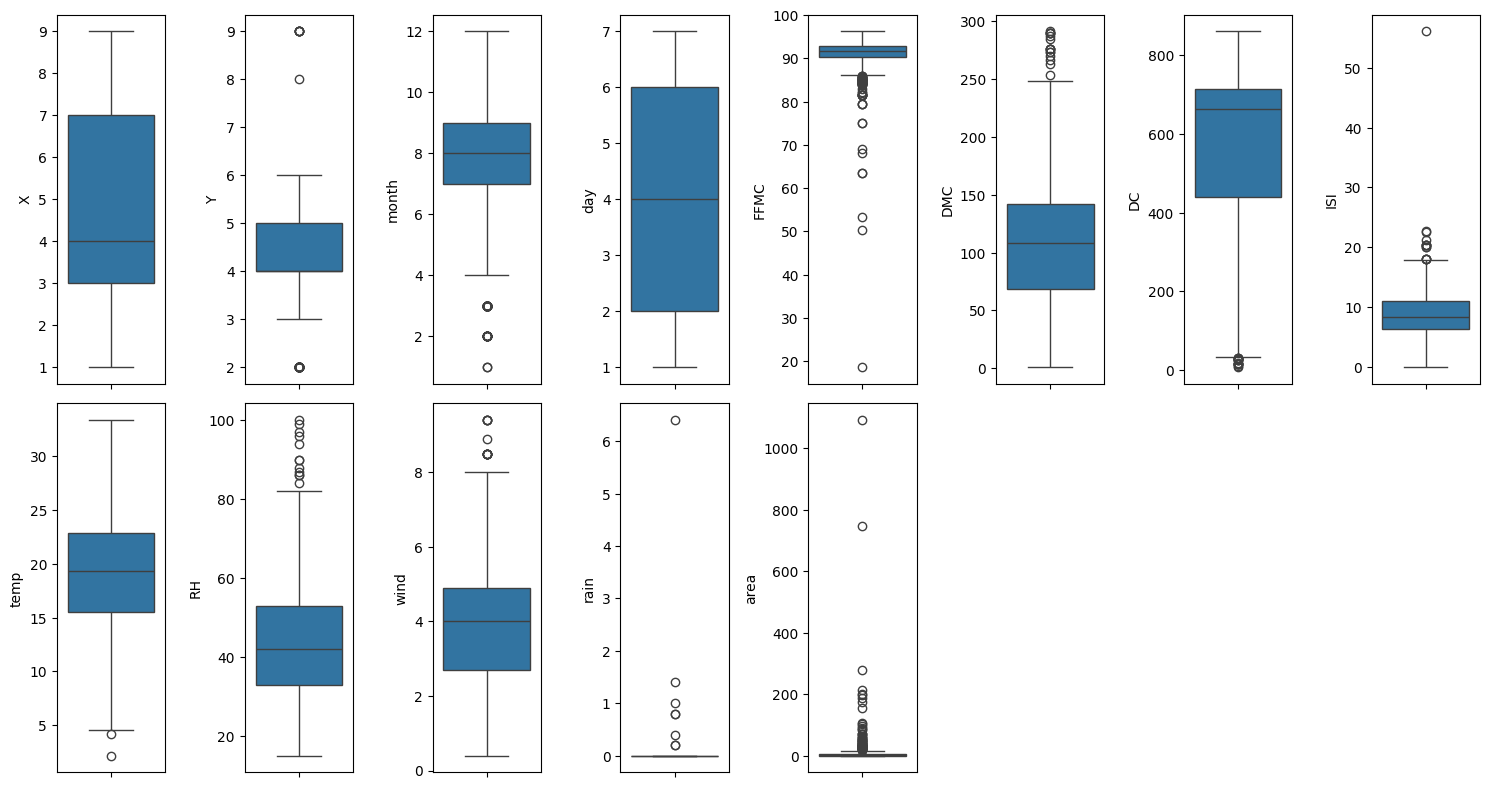

In [ ]:
# data before Handling outliers

plt.figure(figsize=(15, 8))
for i in range(len(data.columns)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(data[data.columns[i]])
    plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
def outliers_handler(data, const):
    filtered_data = data
    all = {}
    for i in data.columns:
        if i not in  ['rain', 'area', 'FFMC', 'DMC', "DC", "ISI", "temp", "RH", "wind"]:
            continue
        else:
            iqr = data[i].quantile(0.75) - data[i].quantile(0.25)
            lower = data[i].quantile(0.25) - (const * iqr)
            upper = data[i].quantile(0.75) + (const * iqr)

            filtered = filtered_data[((data[i] >= lower) & (data[i] <= upper))]
            print(filtered.shape)
            all[filtered.shape[0]] = filtered
    min_key = min(all.keys())
    print("Min rows: ", min_key)
    return all[min_key]

# outliers shape's depends on two main factores "IQR", "constant" : IQR = Q3 - Q1
data = outliers_handler(data, 2)
data.shape

(476, 13)
(512, 13)
(513, 13)
(505, 13)
(513, 13)
(508, 13)
(509, 13)
(505, 13)
(455, 13)
Min rows:  455


(455, 13)

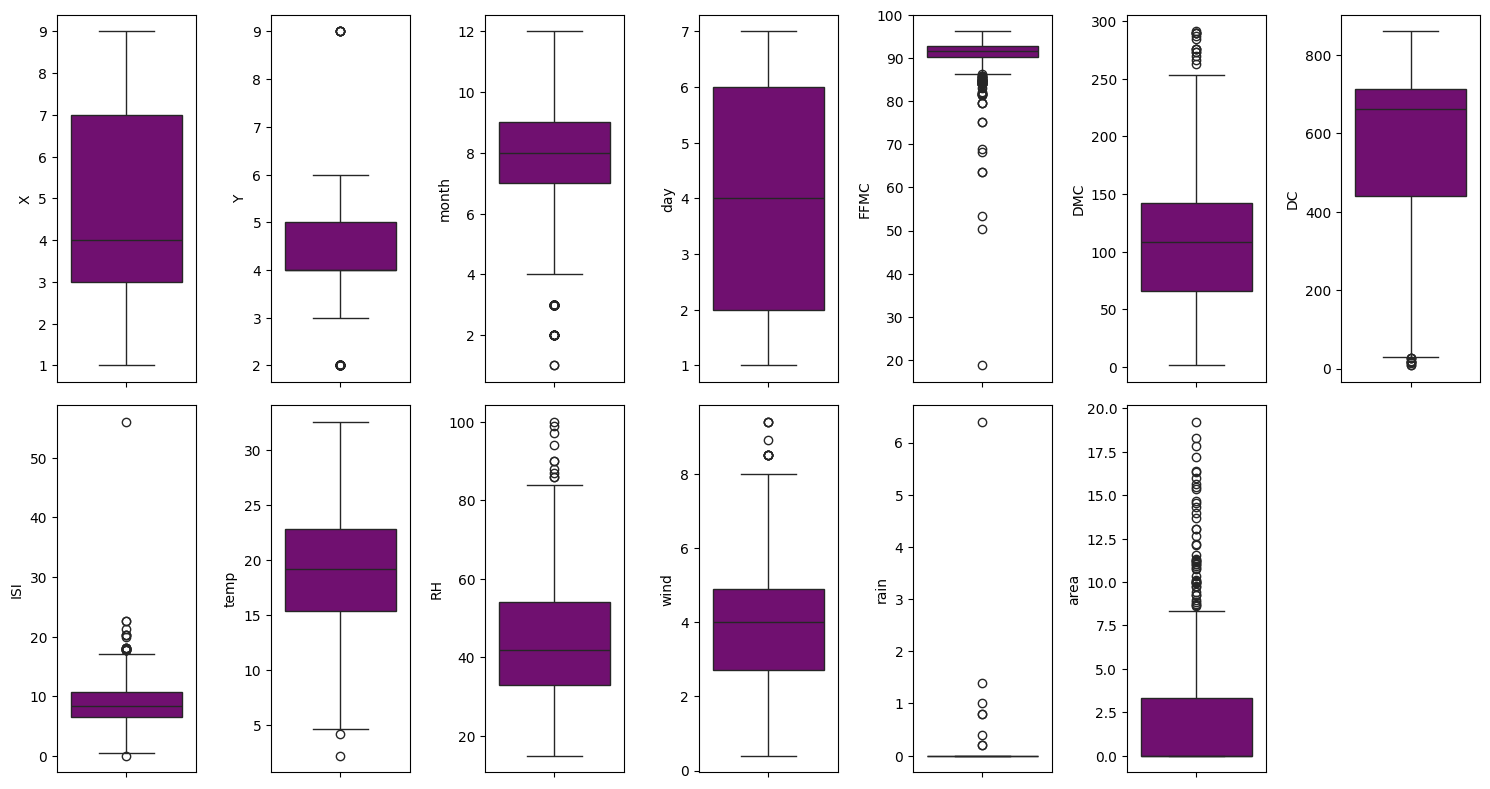

In [ ]:
# data after Handling outliers

plt.figure(figsize=(15, 8))

for i in range(len(data.columns)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(data[data.columns[i]], color='purple')
plt.tight_layout()
plt.show()


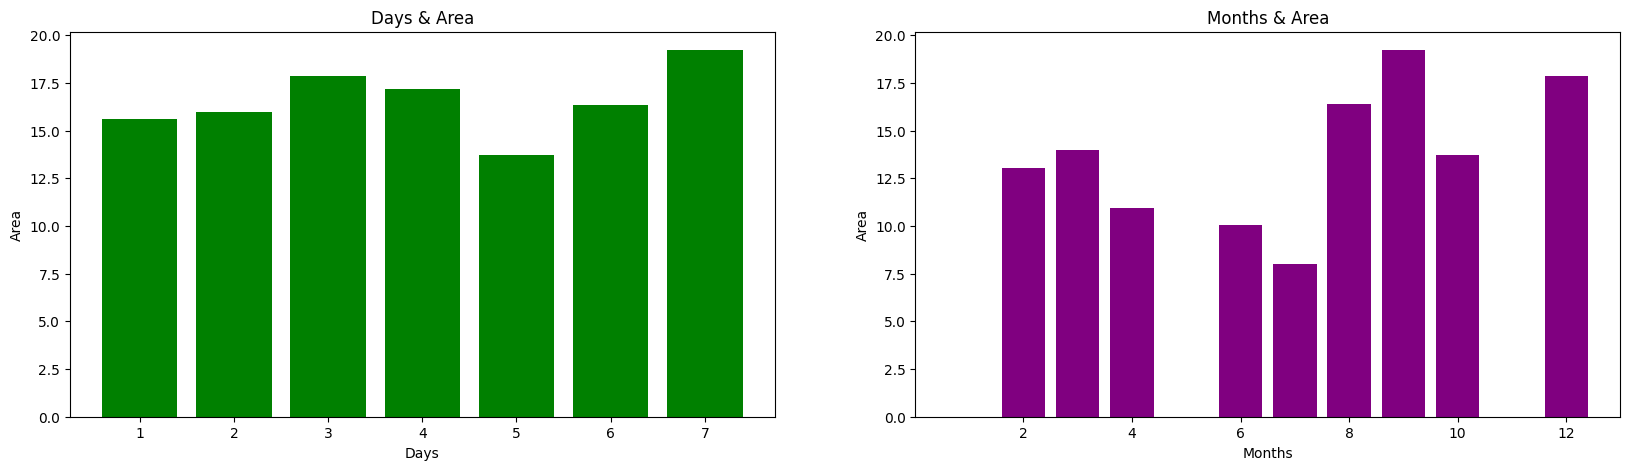

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.bar(data['day'], data['area'], color="green")
plt.title("Days & Area")
plt.xlabel("Days")
plt.ylabel("Area")

plt.subplot(122)
plt.bar(data['month'], data['area'], color="purple")
plt.title("Months & Area")
plt.xlabel("Months")
plt.ylabel("Area")

plt.show()

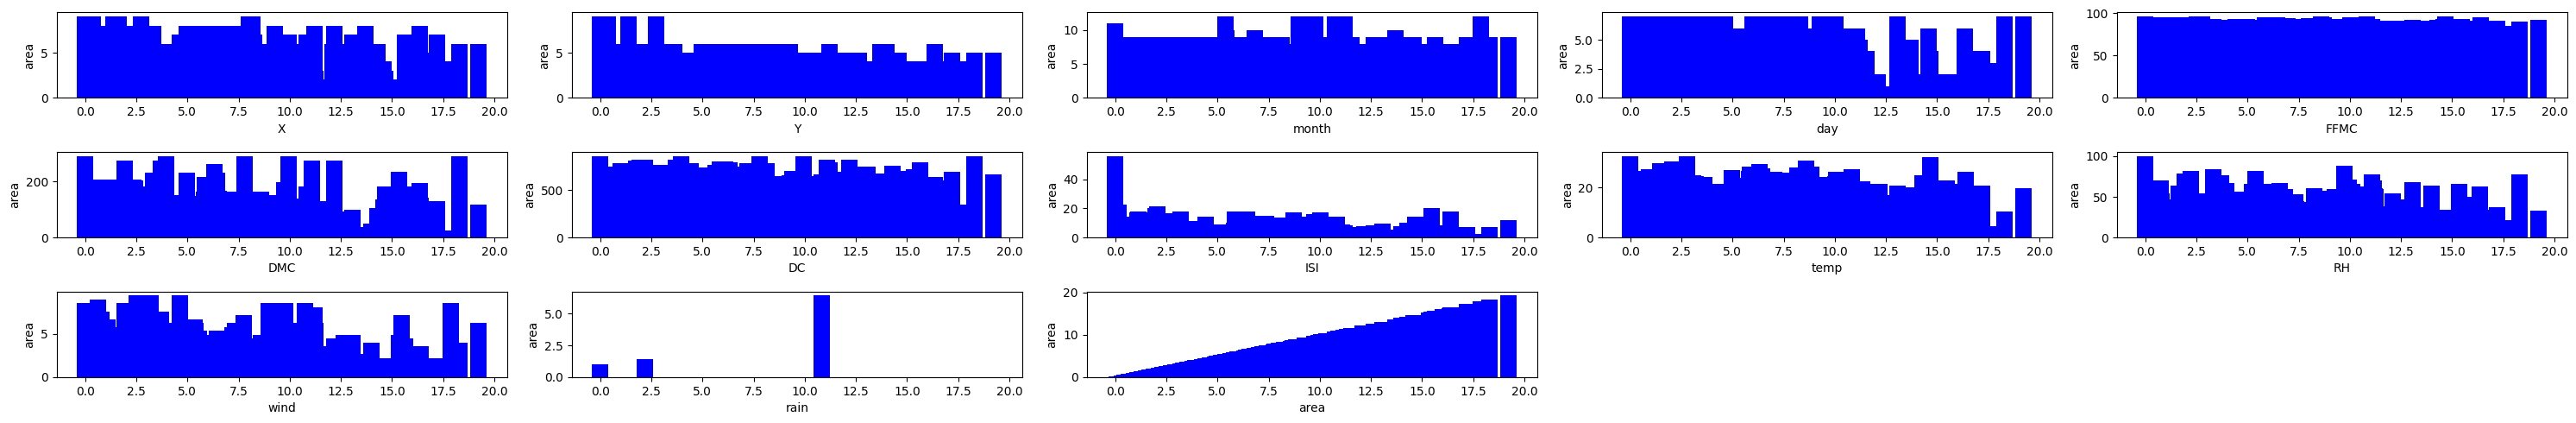

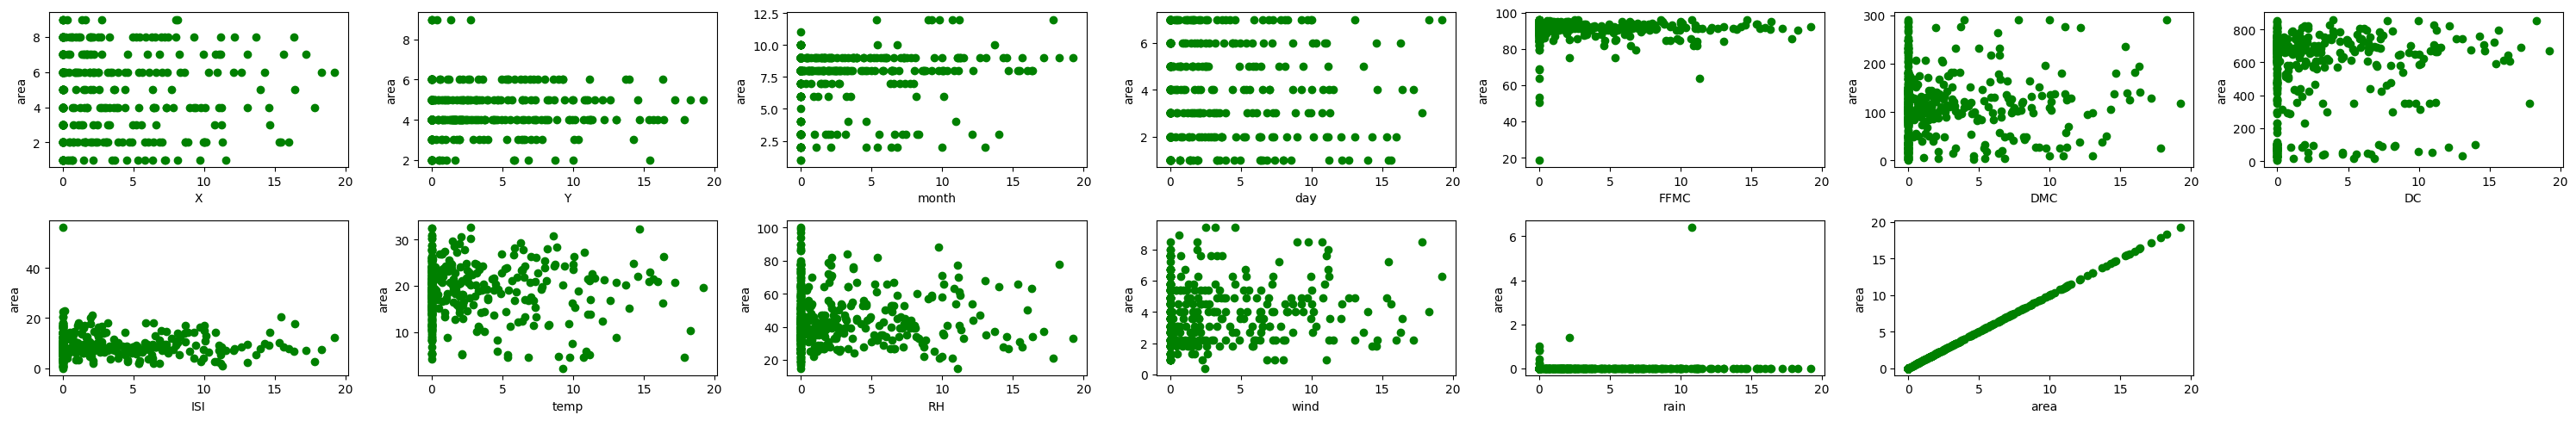

In [ ]:

plt.figure(figsize=(30, 5))

for i in range(len(data.columns)):
    plt.subplot(3, 5, i+1)
    plt.bar(data['area'], data[data.columns[i]], color='blue')
    plt.xlabel(data.columns[i])
    plt.ylabel("area")

plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 5))

for i in range(len(data.columns)):
    plt.subplot(2, 7, i+1)
    plt.scatter(data['area'], data[data.columns[i]], color="green")
    plt.xlabel(data.columns[i])
    plt.ylabel("area")

plt.tight_layout()
plt.show()

In [ ]:
# create a copy from the main data for fitting classification Models and add the classes column or classification target
def create_classes(x):
    if x >= 0.0 and x < 6:
        return "small"
    elif x >= 6 and x < 15:
        return "mid"
    else:
        return "Huge"
classification_data = data.copy()
classification_data['area_classes'] = classification_data['area'].apply(lambda x: create_classes(x))

pie_plot = classification_data['area_classes'] # specific part for the labels for pie plot later

area_cls = {'small': 1, 'mid': 2, 'Huge': 3}
classification_data['area_classes'] = classification_data['area_classes'].apply(lambda x: area_cls[x])



<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Data Normalization</h1>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])

data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.454670,0.329356,0.585015,0.479487,0.927229,0.377587,0.632032,0.160906,0.546327,0.348804,0.397167,0.003846,0.129286
std,0.288068,0.175929,0.207789,0.349210,0.074614,0.222544,0.292587,0.082682,0.189531,0.192707,0.199117,0.049282,0.210678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.285714,0.545455,0.166667,0.922581,0.221744,0.505922,0.114973,0.434211,0.211765,0.255556,0.000000,0.000000
50%,0.375000,0.285714,0.636364,0.500000,0.940645,0.369400,0.766272,0.149733,0.559211,0.317647,0.400000,0.000000,0.000000
75%,0.750000,0.428571,0.727273,0.833333,0.956774,0.485010,0.828193,0.190731,0.677632,0.458824,0.500000,0.000000,0.173687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Data Spliting for each Type of models</h1>


In [ ]:
# Regression
X_REG = data.drop("area", axis=1)
Y_REG = data['area']
X_REG_train, X_REG_test, Y_REG_train, Y_REG_test = train_test_split(X_REG, Y_REG, test_size=0.15, shuffle=True)

# Classification
X_CLS = classification_data.drop(["area", "area_classes"], axis=1)
Y_CLS = classification_data['area_classes']
X_CLS_train, X_CLS_test, Y_CLS_train, Y_CLS_test = train_test_split(X_CLS, Y_CLS, test_size=0.15, shuffle=True)

# Clustering
cluster_data = data.drop("area", axis=1)
X_cluster_train = cluster_data.iloc[:300, :].values
X_cluster_test  = cluster_data.iloc[300:, :].values

<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Regression</h1>


In [ ]:
# First_Model "Linear regression"
Linear_Regression_Model = LinearRegression(n_jobs=-1)
Linear_Regression_Model.fit(X_REG_train, Y_REG_train)
Linear_Regression_Model_predictions = Linear_Regression_Model.predict(X_REG_test)

In [ ]:
# Second_Model "Random Forest Regressor"
n = 5
depth = 20
Random_forest_regressor = RandomForestRegressor(n_estimators=n, max_depth=depth)
Random_forest_regressor.fit(X_REG_train, Y_REG_train)
Random_forest_regressor_prediction = Random_forest_regressor.predict(X_REG_test)

In [ ]:
# Second_Model "Decision Tree Regressor"
depth = 20
Decision_Tree__regression_Model = DecisionTreeRegressor(max_depth=depth)
Decision_Tree__regression_Model.fit(X_REG_train, Y_REG_train)
Decision_Tree__regression_Model_prediction = Decision_Tree__regression_Model.predict(X_REG_test)

<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Regression Evaluation</h1>


In [ ]:
# First Model Evaluation
print(f"Mean Square Error   [MSE] : {mse(Y_REG_test, Linear_Regression_Model_predictions)}")
print(f"Mean absolute Error [MAE] : {mae(Y_REG_test, Linear_Regression_Model_predictions)}")

Mean Square Error   [MSE] : 0.03424649303045018
Mean absolute Error [MAE] : 0.14613457426041562


In [ ]:
# Second Model Evaluation
print(f"Mean Square Error   [MSE] : {mse(Y_REG_test, Random_forest_regressor_prediction)}")
print(f"Mean absolute Error [MAE] : {mae(Y_REG_test, Random_forest_regressor_prediction)}")

Mean Square Error   [MSE] : 0.05016288514389066
Mean absolute Error [MAE] : 0.1766086102381293


In [ ]:
# Third Model Evaluation
print(f"Mean Square Error   [MSE] : {mse(Y_REG_test, Decision_Tree__regression_Model_prediction)}")
print(f"Mean absolute Error [MAE] : {mae(Y_REG_test, Decision_Tree__regression_Model_prediction)}")

Mean Square Error   [MSE] : 0.12224931300483599
Mean absolute Error [MAE] : 0.23308362286182263


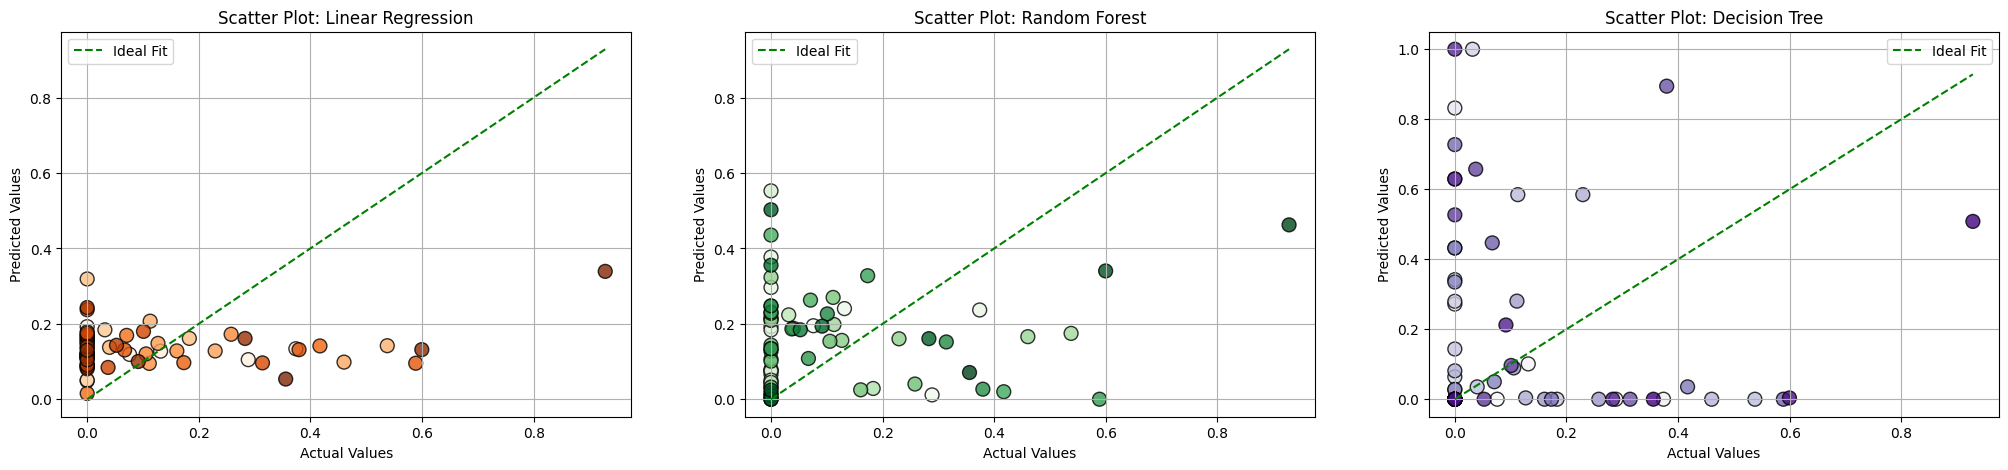

In [ ]:
plt.figure(figsize=(25, 5))

plt.subplot(1,3,1)
plt.scatter( Y_REG_test, Linear_Regression_Model_predictions, c=range(len(Y_REG_test)),   s=100,   cmap="Oranges", edgecolor='black',   alpha=0.8  )

# Add labels, title, and diagonal line
plt.plot([min(Y_REG_test), max(Y_REG_test)], [min(Y_REG_test), max(Y_REG_test)], color='green', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Linear Regression")
plt.legend()
plt.grid(True)  # Add gridlines

# ------------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,3,2)
plt.scatter( Y_REG_test, Random_forest_regressor_prediction, c=range(len(Y_REG_test)),   s=100,   cmap="Greens", edgecolor='black',   alpha=0.8  )

# Add labels, title, and diagonal line
plt.plot([min(Y_REG_test), max(Y_REG_test)], [min(Y_REG_test), max(Y_REG_test)], color='green', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Random Forest")
plt.legend()
plt.grid(True)  # Add gridlines

# ------------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,3,3)
plt.scatter( Y_REG_test, Decision_Tree__regression_Model_prediction, c=range(len(Y_REG_test)),   s=100,   cmap="Purples", edgecolor='black',   alpha=0.8  )

# Add labels, title, and diagonal line
plt.plot([min(Y_REG_test), max(Y_REG_test)], [min(Y_REG_test), max(Y_REG_test)], color='green', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Decision Tree")
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">Classification</h1>


In [ ]:
fig = px.pie(classification_data, names=pie_plot, values="area_classes", title="Types of Areas")
fig.update_layout(
    legend_title="Area Classes",  # Title for the legend
    showlegend=True,              # Ensure legend is displayed
    legend=dict(
        x=1,                       # Position the legend to the right
        y=0.5,                     # Center the legend vertically
        traceorder="normal",       # Legend items appear in order
        orientation="v"            # Vertical orientation
    ),
)
fig.show()

In [ ]:
classification_model1 = LogisticRegression()
classification_model1.fit(X_CLS_train, Y_CLS_train)
classification_pred1 = classification_model1.predict(X_CLS_test)

class_names = ['small', 'mid', 'big']
print(classification_report(classification_pred1, Y_CLS_test)) # Evaluating Logistic Regression model

              precision    recall  f1-score   support

           1       1.00      0.83      0.90        69
           2       0.00      0.00      0.00         0

    accuracy                           0.83        69
   macro avg       0.50      0.41      0.45        69
weighted avg       1.00      0.83      0.90        69



In [ ]:
classification_model2 = DecisionTreeClassifier(max_depth=300)
classification_model2.fit(X_CLS_train, Y_CLS_train)
classification_pred2 = classification_model2.predict(X_CLS_test)

print(classification_report(classification_pred2, Y_CLS_test)) # Evaluating Decision Tree Classification Model

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        57
           2       0.08      0.10      0.09        10
           3       0.00      0.00      0.00         2

    accuracy                           0.70        69
   macro avg       0.30      0.31      0.31        69
weighted avg       0.69      0.70      0.69        69



In [ ]:
classification_model3 = RandomForestClassifier(max_depth=150, n_estimators=200)
classification_model3.fit(X_CLS_train, Y_CLS_train)
classification_pred3 = classification_model3.predict(X_CLS_test)

print(classification_report(classification_pred3, Y_CLS_test)) # Evaluating Random Forest Classification Model

              precision    recall  f1-score   support

           1       0.95      0.83      0.89        65
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1

    accuracy                           0.78        69
   macro avg       0.32      0.28      0.30        69
weighted avg       0.89      0.78      0.83        69



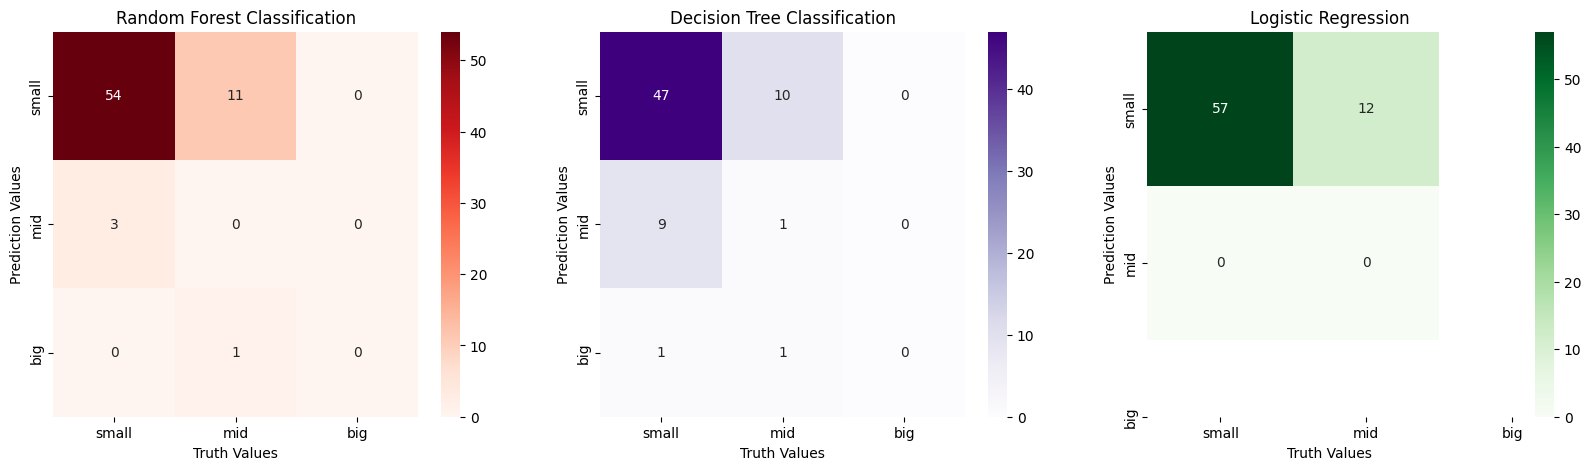

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(classification_pred3, Y_CLS_test), xticklabels=class_names, yticklabels=class_names, annot=True, cmap="Reds")
plt.title("Random Forest Classification")
plt.xlabel("Truth Values")
plt.ylabel("Prediction Values")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(classification_pred2, Y_CLS_test), xticklabels=class_names, yticklabels=class_names, annot=True, cmap="Purples")
plt.title("Decision Tree Classification")
plt.xlabel("Truth Values")
plt.ylabel("Prediction Values")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(classification_pred1, Y_CLS_test), annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Greens")
plt.title("Logistic Regression")
plt.xlabel("Truth Values")
plt.ylabel("Prediction Values")

plt.show()

<h1 style="background-color:white; color:darkred; font-weight:bolder; text-align:center; border-radius:20px; padding:20px;">CLUSTERING</h1>

In [ ]:
# handling the data to fit the clustering
n = 5
kmeans = KMeans(n_clusters=n, random_state=42, max_iter=50, tol=0.002)
cluster_data['clusters'] = kmeans.fit_predict(cluster_data[['X', 'Y', 'rain', 'temp']])
kmeans.inertia_

23.709822436584833

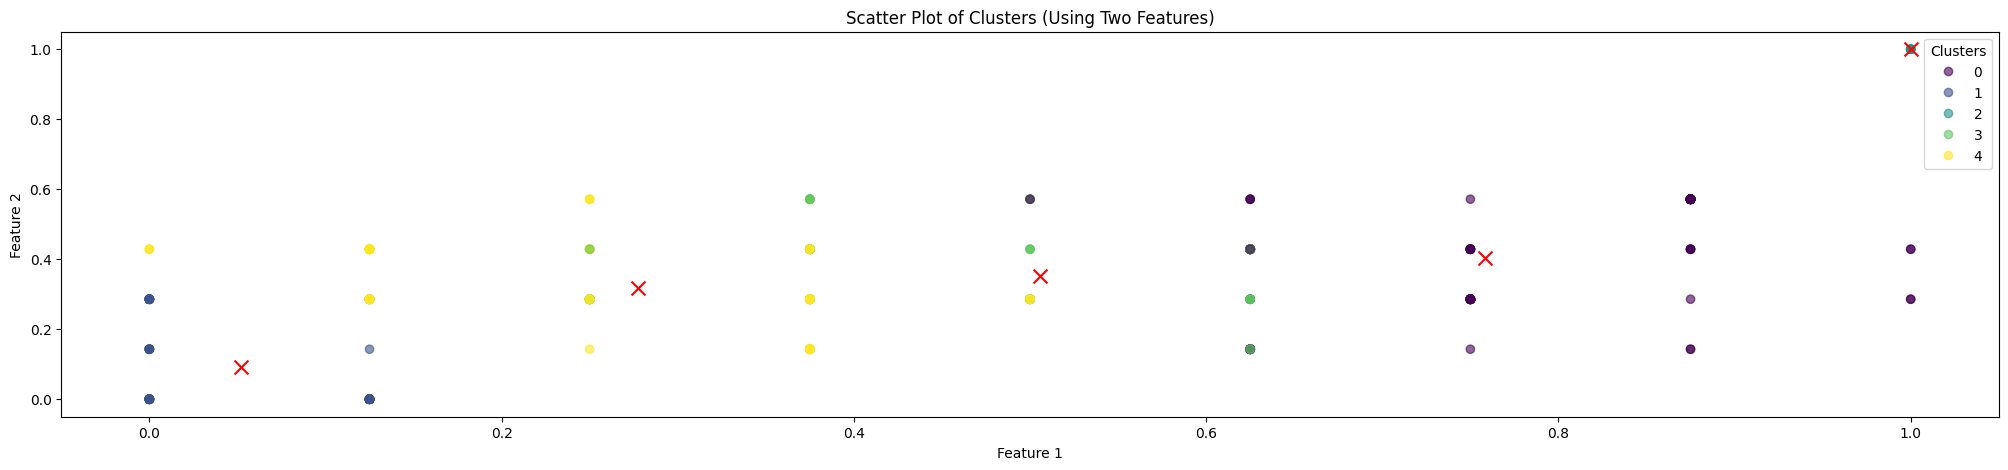

In [ ]:
x1 = cluster_data.iloc[:, 0]  # First feature
x2 = cluster_data.iloc[:, 1]  # Second feature

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(25, 5))
scatter = plt.scatter(x1, x2, c=cluster_data['clusters'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

# Add labels and title
plt.title('Scatter Plot of Clusters (Using Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a legend based on the clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [ ]:
# handling the data to fit the clustering
EPS = 0.1
min_s = 5
dbscan = DBSCAN(eps=EPS, min_samples=min_s)
cluster_data['clusters'] = dbscan.fit_predict(cluster_data[['X', 'Y', 'temp', 'rain']])

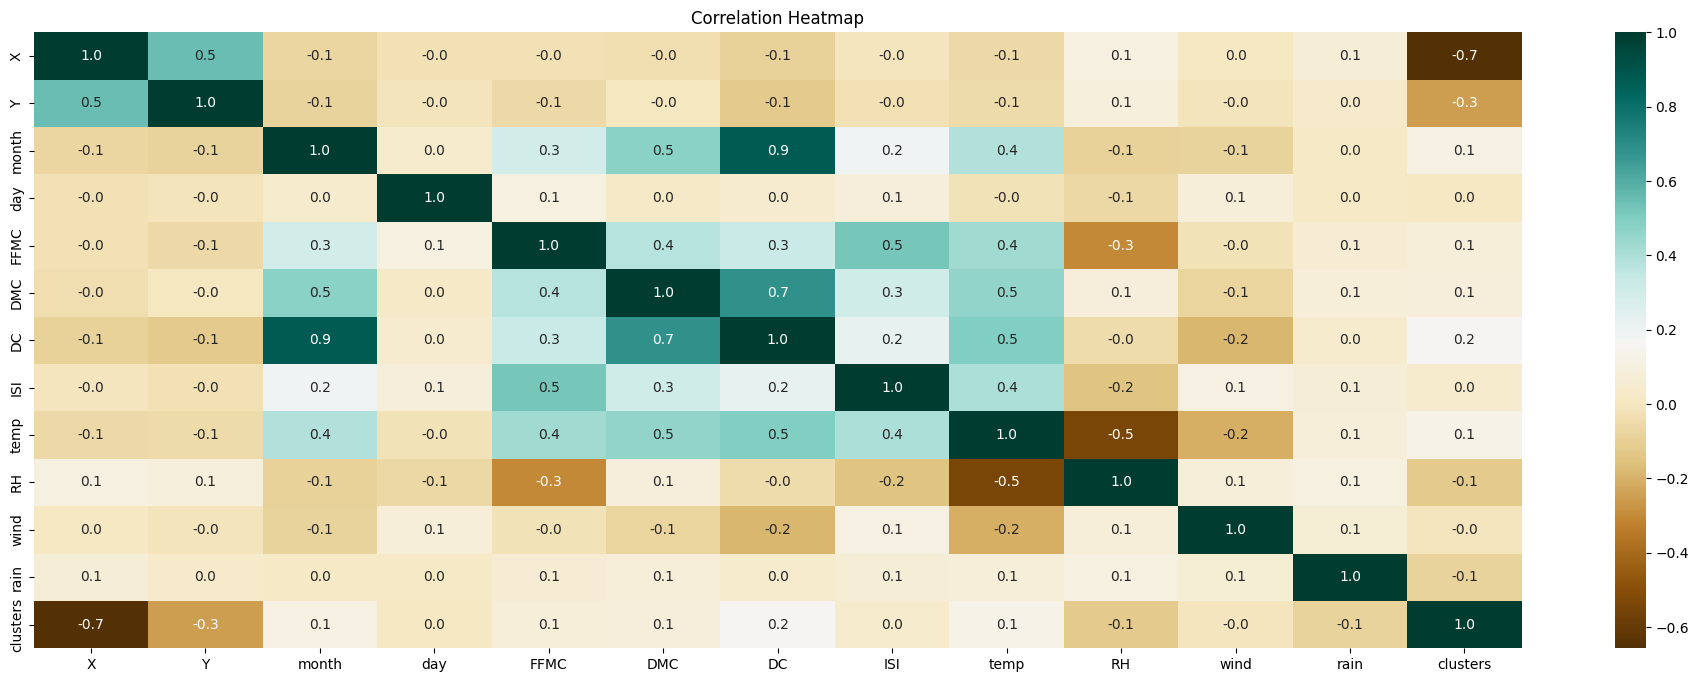

In [ ]:
drow_corr_heatMap(cluster_data)

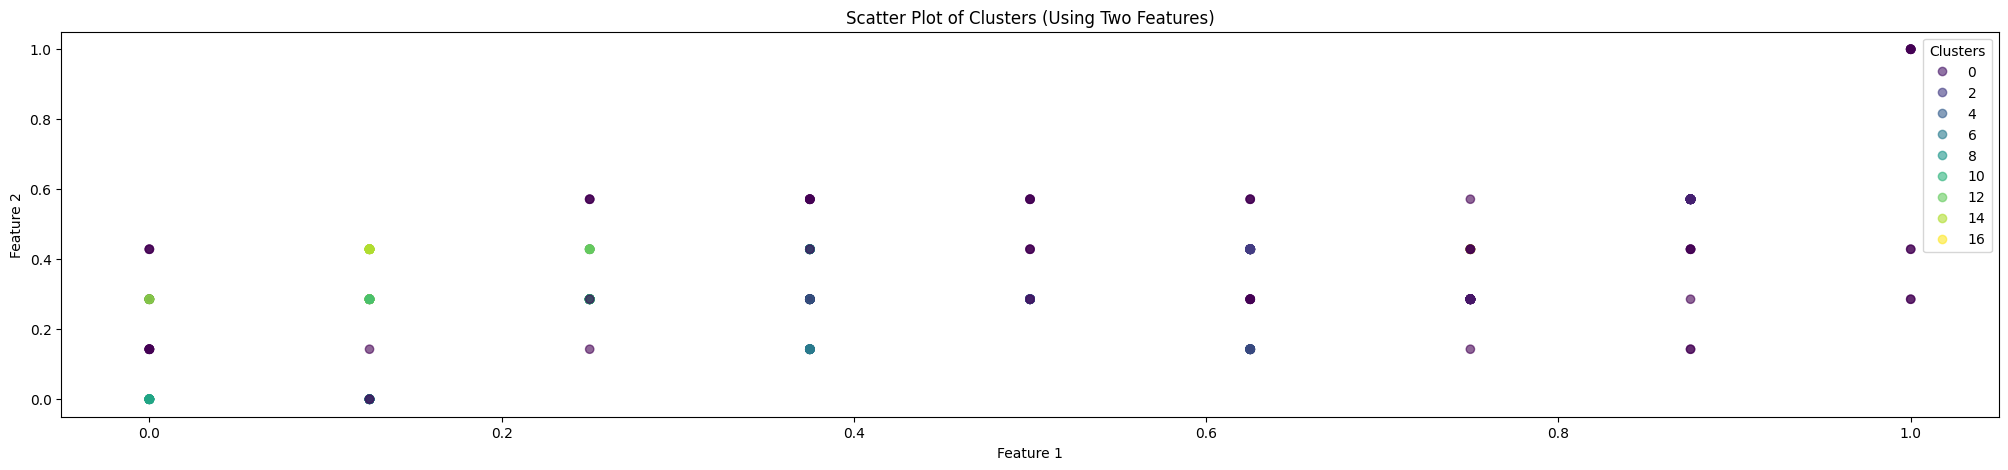

In [ ]:
x1 = cluster_data.iloc[:, 0]  # First feature
x2 = cluster_data.iloc[:, 1]  # Second feature

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(25, 5))
scatter = plt.scatter(x1, x2, c=cluster_data['clusters'], cmap='viridis', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Clusters (Using Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a legend based on the clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()
